In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Dataset

In [2]:
airline = pd.read_csv('flight.csv')
airline.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Data Understanding

In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**Observation**

1. Fitur: `FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE` seharusnya tipe datanya adalah DateTime
2. Fitur: `Age` seharusnya tipe data Integer

In [4]:
#melihat jumlah baris dan kolom
print("Total Baris dataset :", airline.shape[0])
print("Total Kolom dataset :", airline.shape[1])

Total Baris dataset : 62988
Total Kolom dataset : 23


## Missing Values Checking

In [5]:
#menghitung jumlah missing values
count = airline.isna().sum().sort_values(ascending = False)
percent = round(airline.isna().mean()*100,2).sort_values(ascending = False)

missing_values = pd.concat([count, percent], axis = 1, keys=["Count","Percent (%)"])
missing_values

,Count,Percent (%)
WORK_PROVINCE,3248,5.16
WORK_CITY,2269,3.60
SUM_YR_1,551,0.87
AGE,420,0.67
SUM_YR_2,138,0.22
WORK_COUNTRY,26,0.04
GENDER,3,0.00
MEMBER_NO,0,0.00
LAST_FLIGHT_DATE,0,0.00
Points_Sum,0,0.00


In [6]:
#menghitung jumlah total missing value

airline_na_count= airline.shape[0] - airline.dropna().shape[0]
airline_na_percent = round((airline.shape[0] - airline.dropna().shape[0])/airline.shape[0]*100,2)
print("Jumlah Missing Value :", airline_na_count)
print("Jumlah Persentase Missing Value :",airline_na_percent,"%")

Jumlah Missing Value : 4733
Jumlah Persentase Missing Value : 7.51 %


## Duplicate Checking

In [7]:
#melihat data duplikat
airline.duplicated().sum()

0

**Hasil Observation**

1. Jumlah baris dataset sebanyak 62988 dan kolom sebanyak 23
2. Terdapat missing values pada dataset sebanyak 4733 data atau sebesar 7.51%
3. Dataset tidak terdapat data duplikat

# Exploratory Data Analyst

## Pengelompokan Data Berdasarkan Tipe Data

In [8]:
#mengelompokkan Fitur kategorikal dan Fitur numerik

cats = airline.select_dtypes(include="object").columns.tolist()
nums = airline.select_dtypes(exclude="object").columns.tolist()
print("Fitur Kategorikal :", cats)
print("Jumlah Fitur Kategorikal :", len(cats),"\n")
print("Fitur Numerical :", nums)
print("Jumlah Fitur Numerical :", len(nums),"\n")


Fitur Kategorikal : ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Jumlah Fitur Kategorikal : 8 

Fitur Numerical : ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
Jumlah Fitur Numerical : 15 



## Descriptive Statistic

In [9]:
#statistikal summary data numerikal
airline[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


**Observation**

1. Mayoritas Fitur memiliki nilai Mean > Median menandakan fitur cenderung positive skew
2. Pada Fitur `MEMBER_NO, FFP_TIER, avg_discount` memiliki Mean dan Median hampir sama menandakan fitur cenderung berdistribusi normal
3. Terdapat nilai 0 pada fitur `BP_SUM, SUM_YR_1, SUM_YR_2, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight`

In [10]:
#stastikal summary data kategorikal
airline[cats].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [11]:
gender_percent = round(48134/62985 *100, 2)
workcity_percent = round(9386/60719 *100, 2)
workprovince_percent = round(17509/59740 *100, 2)
workcountry_percent = round(57748/62962 *100, 2)

print("Jumlah % Male:", gender_percent)
print("Jumlah % Work City:", workcity_percent)
print("Jumlah % Work Province", workprovince_percent)
print("Jumlah % Work Country:", workcountry_percent)

Jumlah % Male: 76.42
Jumlah % Work City: 15.46
Jumlah % Work Province 29.31
Jumlah % Work Country: 91.72


In [12]:
#melihat banyak value pada Fitur Kategorikal
for col in cats:
  print(f"Value pada {col} adalah")
  print(airline[col].value_counts(), "\n")
  print("==========================================")

Value pada FFP_DATE adalah
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64 

Value pada FIRST_FLIGHT_DATE adalah
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64 

Value pada GENDER adalah
Male      48134
Female    14851
Name: GENDER, dtype: int64 

Value pada WORK_CITY adalah
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64 

Value pada WORK_PROVINCE adalah
guangdong        17509
beijing           8014
shanghai          4998
liaon

**Observation**

1. Mayoritas pengguna maskapai adalah laki-laki sebesar 76.42%
2. Mayoritas pengguna maskapai berasal dari kota Guangzhou sebesar 15.46%
3. Mayoritas pengguna maskapai berasal dari Provinsi Guangdong sebesar 29.31%
4. Mayoritas pengguna maskapai berasal Kode Negara CN sebesar 91.72%
5. Fitur `WORK_CITY, WORK_PROVINCE, WORK_COUNTRY` memiliki banyak unique value
6. Fitur: `FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE` seharusnya tipe datanya adalah DateTime

## Univariate Analysis

### Data Numerikal

Melihat boxplot data numerikal untuk lihat distribusi data dan outliers

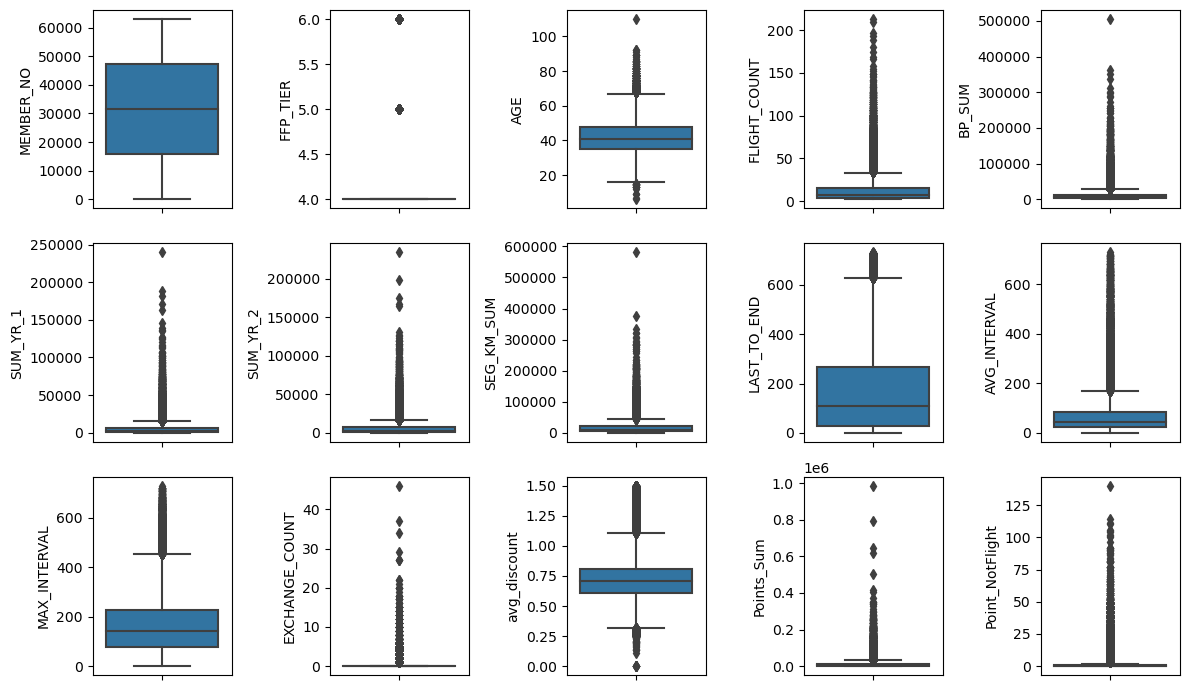

In [13]:
plt.figure(figsize=(12,7))

for i in range(len(nums)):
    plt.subplot(3, len(nums)//3, i+1)
    sns.boxplot(y= airline[nums[i]])
plt.tight_layout()
plt.show()

Melihat distribusi data numerikal menggunakan Histogram dan KDE Plot

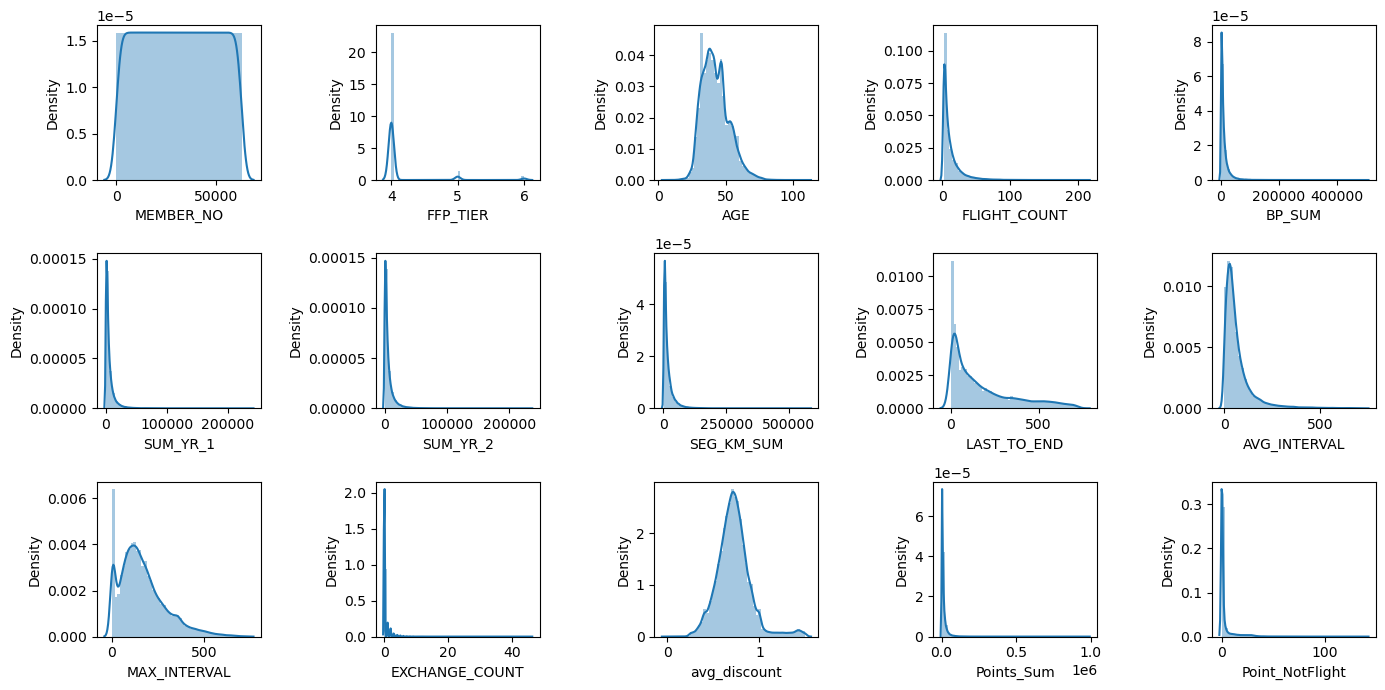

In [14]:
plt.figure(figsize=(14,7))

for i in range(len(nums)):
    plt.subplot(3, len(nums)//3, i+1)
    sns.distplot(x= airline[nums[i]])
    plt.xlabel(nums[i])
plt.tight_layout()
plt.show()

**Observation**

1. Terlihat bahwa fitur `FFP_TIER` merupakan data kategorikal karena memiliki Discrete Value dari 4 - 6
2. Terlihat bahwa fitur mayoritas berdistribusi positif skew dan memiliki nilai extreme (outliers)
3. Fitur `MEMBER_NO` merupakan unique values jadi bisa diabaikan tidak perlu dilihat distribusinya
4. Fitur`avg_discount` distribusinya cenderung normal

### Data Kategorikal

Melihat perbandingan banyaknya data Kategorikal menggunakan Countplot

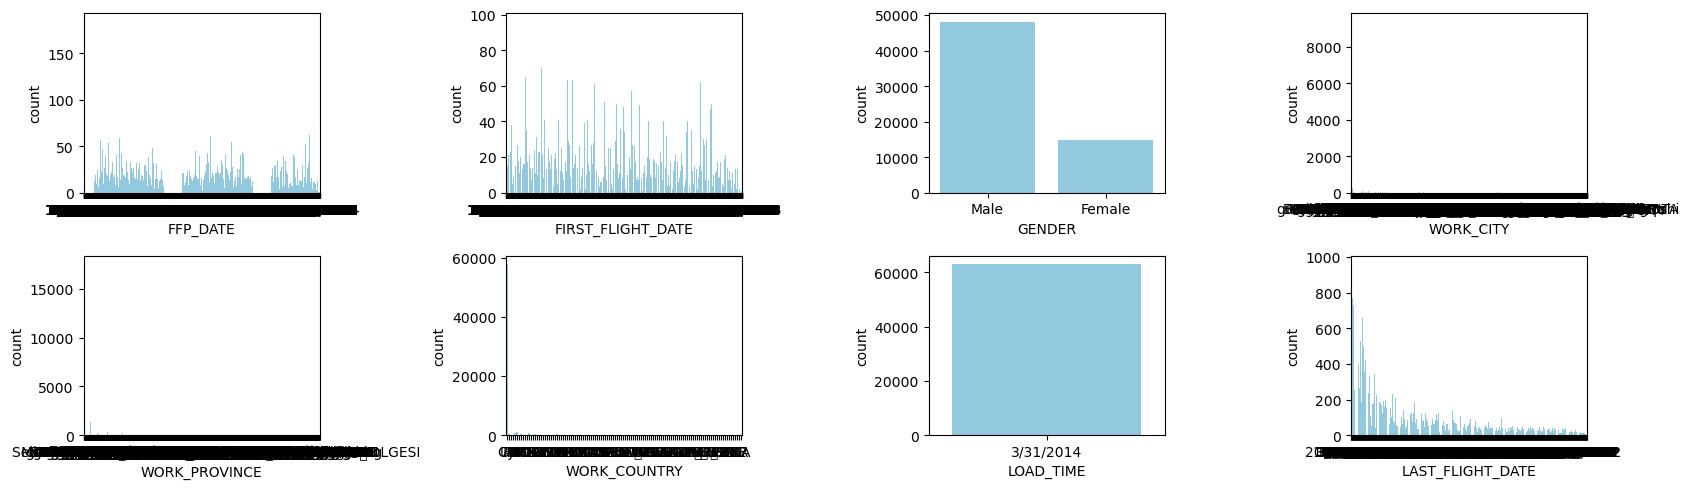

In [15]:
plt.figure(figsize=(17,5))

for i in range(len(cats)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=airline[cats[i]], color="skyblue")
plt.tight_layout()
plt.show()

**Observation**

Tidak banyak insight yang didapatkan oleh karena itu scope untuk fitur `WORK_CITY,WORK_PROVINCE, WORK_COUNTRY` akan diperkecil menjadi 10 terbesar

#### Visualisasi WORK_CITY, WORK_PROVINCE, WORK_COUNTRY

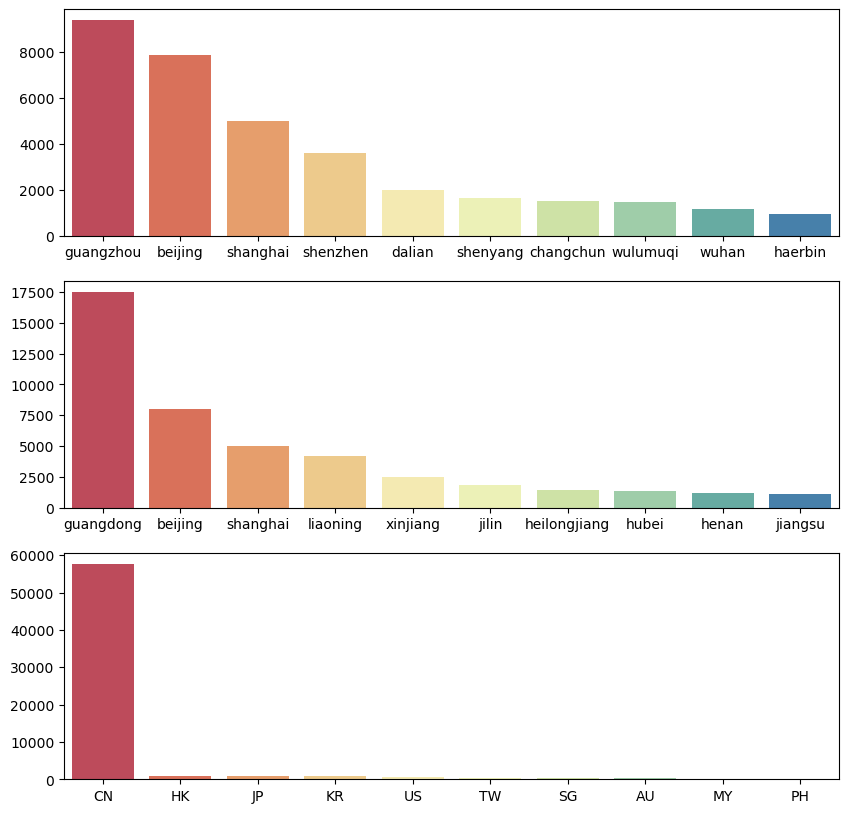

In [16]:
airline_workcity_top10 = airline["WORK_CITY"].value_counts().head(10)
airline_workprovince_top10 = airline["WORK_PROVINCE"].value_counts().head(10)
airline_workcountry_top10 = airline["WORK_COUNTRY"].value_counts().head(10)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.barplot(x=airline_workcity_top10.index, y = airline_workcity_top10.values, ax=ax[0], palette="Spectral")
sns.barplot(x=airline_workprovince_top10.index, y = airline_workprovince_top10.values, ax=ax[1], palette="Spectral")
sns.barplot(x=airline_workcountry_top10.index, y = airline_workcountry_top10.values, ax=ax[2], palette="Spectral")
plt.show()

#### Visualisasi FFP_DATE, FIRST_FLIGHT_DATE, LAST_FLIGHT_DATE

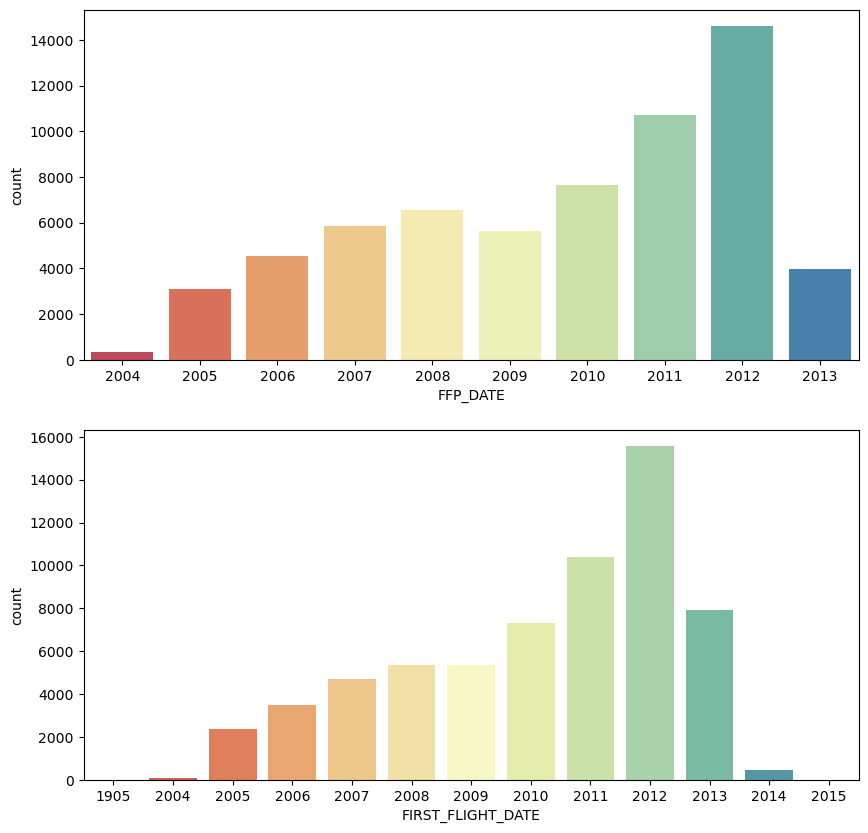

In [17]:
airline_ffp_date = pd.to_datetime(airline["FFP_DATE"]).dt.year
airline_firstflight_date = pd.to_datetime(airline["FIRST_FLIGHT_DATE"]).dt.year
#airline_lastflight_date = pd.to_datetime(airline["LAST_FLIGHT_DATE"]).dt.year

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

sns.countplot(x=airline_ffp_date, ax=ax[0], palette="Spectral")
sns.countplot(x=airline_firstflight_date, ax=ax[1], palette="Spectral")
plt.show()


**Observation**

Terdapat error pada konversi Fitur `LAST_FLIGHT_DATE` pada tanggal 29/02/2014 sedangkan tahun 2014 bukan tahun kabisat oleh karena itu datanya akan didrop nanti


In [18]:
airline_last = airline.copy()

airline_last.drop(airline_last[airline_last["LAST_FLIGHT_DATE"].str.contains("2014/2/29")].index, inplace=True)

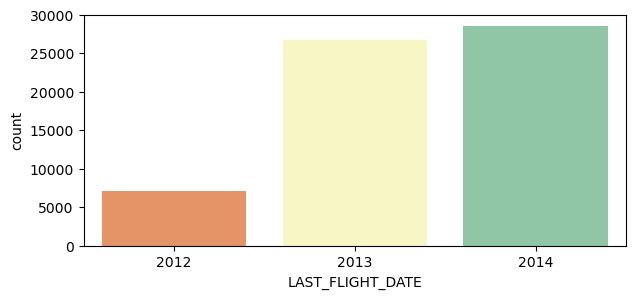

In [19]:
airline_lastflight_date = pd.to_datetime(airline_last["LAST_FLIGHT_DATE"]).dt.year

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,3))
ax = sns.countplot(x=airline_lastflight_date, palette="Spectral")
plt.show()

### **Hasil Observation**

1. Mayoritas Fitur memiliki outlier kecuali fitur `MEMBER_NO,FFP_TIER`
2. Mayoritas memiliki distribusi positif skew kecuali fitur `avg_discount` distribusi cenderung normal
3. Mayoritas pengguna maskapai adalah laki-laki
4. Fitur `LOAD_TIME` hanya memiliki 1 unique value yaitu 3/31/2014
5. terdapat tahun yang sangat jauh pada Fitur `FIRST_FLIGHT_DATE` yaitu tahun 1905
6. Pada Fitur `LAST_FLIGHT_DATE` terjadi error ketika ingin dilakukan konversi dan visualisasi yaitu terdapat tanggal yang tidak masuk akal (02/29/2014) padahal tahun 2014 bukan tahun kabisat

### Multivariate Analysis

Melihat korelasi antar Fitur menggunakan Heatmap

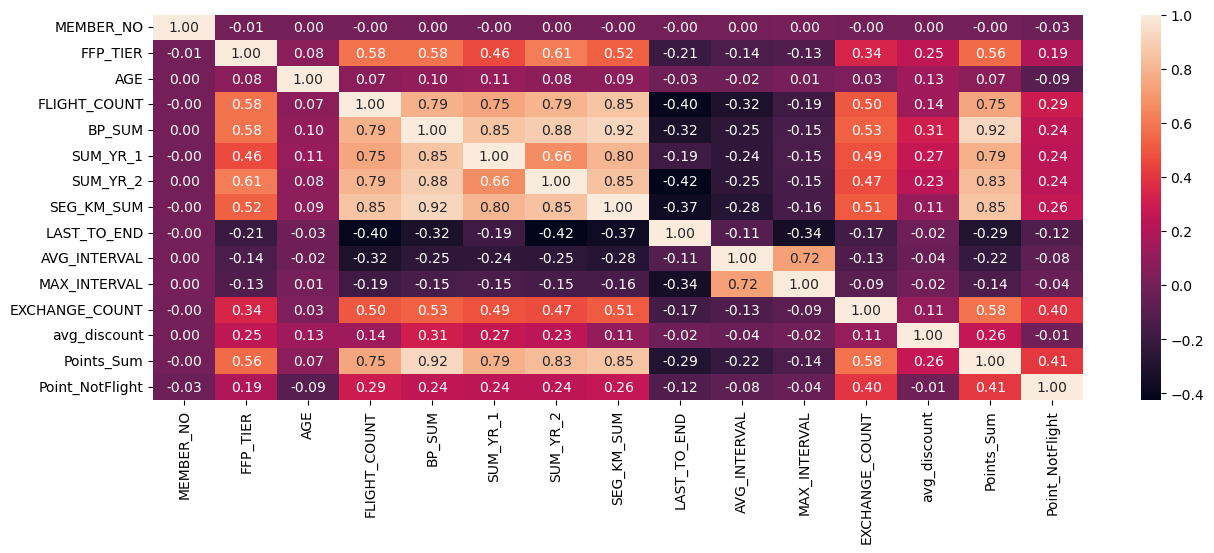

In [20]:
plt.figure(figsize=(15,5))

sns.heatmap(airline.corr(), annot=True, fmt=".2f")
plt.show()

**Observation**

1. Terdapat Fitur yang memiliki korelasi tinggi yaitu fitur `FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, Points_Sum,  AVG_INTERVAL, MAX_INTERVAL`
2. Terlihat korelasi yang kuat pada 5 fitur `FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM` dapat diasumsikan semakin banyak pengguna maskapai dengan penerbangan jarak jauh maka semakin banyak/besar tarif penerbangan

# Data Preprocessing

## Data Cleaning

In [21]:
airline.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


1. Sebelum dilakukan data cleaning akan didrop terlebih dahulu untuk Fitur yang memiliki banyak unique value diantaranya `MEMBER_NO, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY` karena fitur tersebut tidak diperlukan
2. Fitur `Gender` juga akan didrop

In [22]:
#drop fitur
airline_pre = airline.copy()
airline_pre = airline.drop(["MEMBER_NO", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY", "GENDER"], axis= 1)
airline_pre.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,6,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,6,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,6,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [23]:
airline_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62988 non-null  object 
 1   FIRST_FLIGHT_DATE  62988 non-null  object 
 2   FFP_TIER           62988 non-null  int64  
 3   AGE                62568 non-null  float64
 4   LOAD_TIME          62988 non-null  object 
 5   FLIGHT_COUNT       62988 non-null  int64  
 6   BP_SUM             62988 non-null  int64  
 7   SUM_YR_1           62437 non-null  float64
 8   SUM_YR_2           62850 non-null  float64
 9   SEG_KM_SUM         62988 non-null  int64  
 10  LAST_FLIGHT_DATE   62988 non-null  object 
 11  LAST_TO_END        62988 non-null  int64  
 12  AVG_INTERVAL       62988 non-null  float64
 13  MAX_INTERVAL       62988 non-null  int64  
 14  EXCHANGE_COUNT     62988 non-null  int64  
 15  avg_discount       62988 non-null  float64
 16  Points_Sum         629

**Observation**

Fitur dalam dataset sudah berubah menjadi 18 kolom

### Missing Values Handling

In [24]:
#menghitung jumlah missing values
count = airline_pre.isna().sum().sort_values(ascending = False)
percent = round(airline_pre.isna().mean()*100,2).sort_values(ascending = False)

missing_values = pd.concat([count, percent], axis = 1, keys=["Count","Percent (%)"])
missing_values

,Count,Percent (%)
SUM_YR_1,551,0.87
AGE,420,0.67
SUM_YR_2,138,0.22
FFP_DATE,0,0.00
LAST_TO_END,0,0.00
Points_Sum,0,0.00
avg_discount,0,0.00
EXCHANGE_COUNT,0,0.00
MAX_INTERVAL,0,0.00
AVG_INTERVAL,0,0.00


In [25]:
#menghitung jumlah total missing value

airline_na_count= airline_pre.shape[0] - airline_pre.dropna().shape[0]
airline_na_percent = round((airline_pre.shape[0] - airline_pre.dropna().shape[0])/airline_pre.shape[0]*100,2)
print("Jumlah Missing Value :", airline_na_count)
print("Jumlah Persentase Missing Value :",airline_na_percent,"%")

Jumlah Missing Value : 1104
Jumlah Persentase Missing Value : 1.75 %


**Observation**

Dikarenakan jumlah missing value dibawah 10% maka disini akan dilakukan drop

In [26]:
airline_clean = airline_pre.dropna().reset_index(drop=True)
airline_clean.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,6,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,6,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,6,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [27]:
airline_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61884 entries, 0 to 61883
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           61884 non-null  object 
 1   FIRST_FLIGHT_DATE  61884 non-null  object 
 2   FFP_TIER           61884 non-null  int64  
 3   AGE                61884 non-null  float64
 4   LOAD_TIME          61884 non-null  object 
 5   FLIGHT_COUNT       61884 non-null  int64  
 6   BP_SUM             61884 non-null  int64  
 7   SUM_YR_1           61884 non-null  float64
 8   SUM_YR_2           61884 non-null  float64
 9   SEG_KM_SUM         61884 non-null  int64  
 10  LAST_FLIGHT_DATE   61884 non-null  object 
 11  LAST_TO_END        61884 non-null  int64  
 12  AVG_INTERVAL       61884 non-null  float64
 13  MAX_INTERVAL       61884 non-null  int64  
 14  EXCHANGE_COUNT     61884 non-null  int64  
 15  avg_discount       61884 non-null  float64
 16  Points_Sum         618

**Observation**

Jumlah data sekarang menjadi 61884

## Feature Engineering

Dikarenakan pada analisis sebelumnya terdapat tanggal 29/02/2014 sedangkan pada tahun 2014 bukan tahun kabisat maka data tanggal tersebut akan dihapus/drop

In [28]:
#drop data yang terdapat tanggal 2014/2/29
airline_clean.drop(airline_clean[airline_clean["LAST_FLIGHT_DATE"].str.contains("2014/2/29")].index, inplace=True)

Merubah data tanggal yang sebelumnya tipe data Object menjadi tipe data DateTime

In [29]:
#merubah data tanggal sebelumnya object menjadi dateTime
dates = ["FFP_DATE","FIRST_FLIGHT_DATE", "LOAD_TIME", "LAST_FLIGHT_DATE"]

for col in dates:
    airline_clean[col] = pd.to_datetime(airline_clean[col])

In [30]:
airline_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61464 entries, 0 to 61883
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61464 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61464 non-null  datetime64[ns]
 2   FFP_TIER           61464 non-null  int64         
 3   AGE                61464 non-null  float64       
 4   LOAD_TIME          61464 non-null  datetime64[ns]
 5   FLIGHT_COUNT       61464 non-null  int64         
 6   BP_SUM             61464 non-null  int64         
 7   SUM_YR_1           61464 non-null  float64       
 8   SUM_YR_2           61464 non-null  float64       
 9   SEG_KM_SUM         61464 non-null  int64         
 10  LAST_FLIGHT_DATE   61464 non-null  datetime64[ns]
 11  LAST_TO_END        61464 non-null  int64         
 12  AVG_INTERVAL       61464 non-null  float64       
 13  MAX_INTERVAL       61464 non-null  int64         
 14  EXCHAN

**Observation**

1. Fitur `FFP_DATE","FIRST_FLIGHT_DATE", "LOAD_TIME", "LAST_FLIGHT_DATE` sudah dikonversi menjadi tipe data DateTime
2. Jumlah Data sekarang sebesar 61464

### Feature Selection

RFM merupakan model yang banyak digunakan dalam melakukan segmentasi. Model RFM ini terdiri dari Recency, Frequency dan Monetary. Disini untuk feature selection menggunakan LRFMC model, merupakan pengembangan dari RFM model. Berdasarkan riset dari paper yang dibuat oleh Saixin Wu (2022) dan Yang Tao (2020) bahwa LRFMC pada kasus ini adalah: 

1. **L** (Length) : Lamanya waktu keanggotaan customer sejak pertama kali mendaftar sampai dengan periode observasi (semakin lama customer menjadi anggota berarti customer "loyal" atau semakin baik)

2. **R** (Recency) : Lamanya waktu antara customer melakukan penerbangan terakhir sampai periode observasi (semakin kecil artinya customer baru melakukan penerbangan oleh karena itu semakin kecil semakin baik)

3. **F** (Frequency): Jumlah penerbangan customer dalam periode observasi (semakin besar semakin baik yang artinya customer sering melakukan penerbangan)

4. **M** (Monetary) : Akumulasi jarak tempuh penerbangan selama periode observasi (semakin besar semakin baik yang artinya jarak tempuh yang jauh berarti tarif penerbangan semakin besar maka customer mengeluarkan lebih banyak uang)

5. **C** (Discount Coefficient) : Nilai rata-rata faktor diskon yang digunakan selama periode observasi (semakin kecil semakin baik yang artinya semakin sedikit customer menggunakan diskon dalam penerbangannya) 

Oleh karena itu pada kasus yang akan dilakukan analisis ini menggunakan fitur diantaranya adalah: 

- L : `LOAD_TIME` - `FFP_DATE` 

(Jumlah waktu Customer menjadi membership = Waktu terakhir observasi - Tanggal pertama customer mendaftar) dalam bentuk bulan

- R : `LAST_TO_END`
- F : `FLIGHT_COUNT`
- M : `SEG_KM_SUM`
- C : `avg_discount`

In [31]:
airline_LRFMC= airline_clean.copy()
airline_LRFMC= airline_LRFMC[["LOAD_TIME","FFP_DATE","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]]
airline_LRFMC.head(3)

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014-03-31,2006-11-02,1,210,580717,0.961639
1,2014-03-31,2007-02-19,7,140,293678,1.252314
2,2014-03-31,2007-02-01,11,135,283712,1.254676


### Data Transformation

In [32]:
airline_LRFMC["TIME_MONTH"] = ((airline_LRFMC["LOAD_TIME"] - airline_LRFMC['FFP_DATE']).dt.days/30).astype("int")
airline_LRFMC = airline_LRFMC[["TIME_MONTH","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]].copy()

airline_LRFMC

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,90,1,210,580717,0.961639
1,86,7,140,293678,1.252314
2,87,11,135,283712,1.254676
3,68,97,23,281336,1.090870
4,60,5,152,309928,0.970658
...,...,...,...,...,...
61879,14,437,2,3848,0.000000
61880,34,297,2,1134,0.000000
61881,49,89,4,8016,0.000000
61882,97,29,2,2594,0.000000


## Outliers Handling

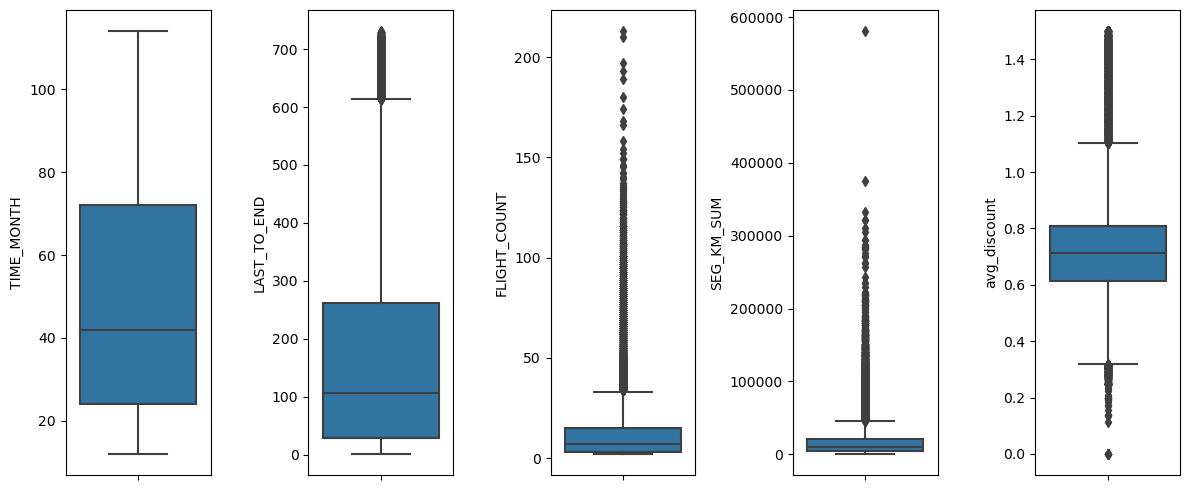

In [33]:
#melihat data outliers

column = airline_LRFMC.columns

plt.figure(figsize=(12,5))

for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    sns.boxplot(y = airline_LRFMC[column[i]])
plt.tight_layout()
plt.show()


**Observation**

1. Terdapat outlier pada Fitur `LAST_TO_END, FLIGHT_COUNT, SEG_KM_SUM, avg_discount`
2. Untuk penanganan outlier disini menggunakan Metode IQR (Interquartile Range) Tukey (1977). Inter Quartile Range (IQR) adalah salah satu prosedur yang paling banyak digunakan untuk mendeteksi dan menghilangkan pencilan (Outliers).

**Prosedur:**

- Temukan kuartil pertama, Q1.
- Temukan kuartil ketiga, Q3.
- Hitung IQR. IQR = Q3-Q1.
- Tentukan rentang data normal dengan batas bawah sebagai Q1 - 1,5 * IQR dan batas atas sebagai Q3 + 1,5 * IQR.

In [34]:
print(f'Jumlah baris sebelum memfilter outlier: {len(airline_LRFMC)}')
column = airline_LRFMC.columns
fil_ent = np.array([True] * len(airline_LRFMC))
for col in column:
    Q1 = airline_LRFMC[col].quantile(0.25)
    Q3 = airline_LRFMC[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((airline_LRFMC[col] >= low_limit) & (airline_LRFMC[col] <= high_limit)) & fil_ent
    
airline_LRFMC = airline_LRFMC[fil_ent].reset_index(drop=True)

print('Jumlah baris setelah memfilter outlier', len(airline_LRFMC))

Jumlah baris sebelum memfilter outlier: 61464
Jumlah baris setelah memfilter outlier 51650


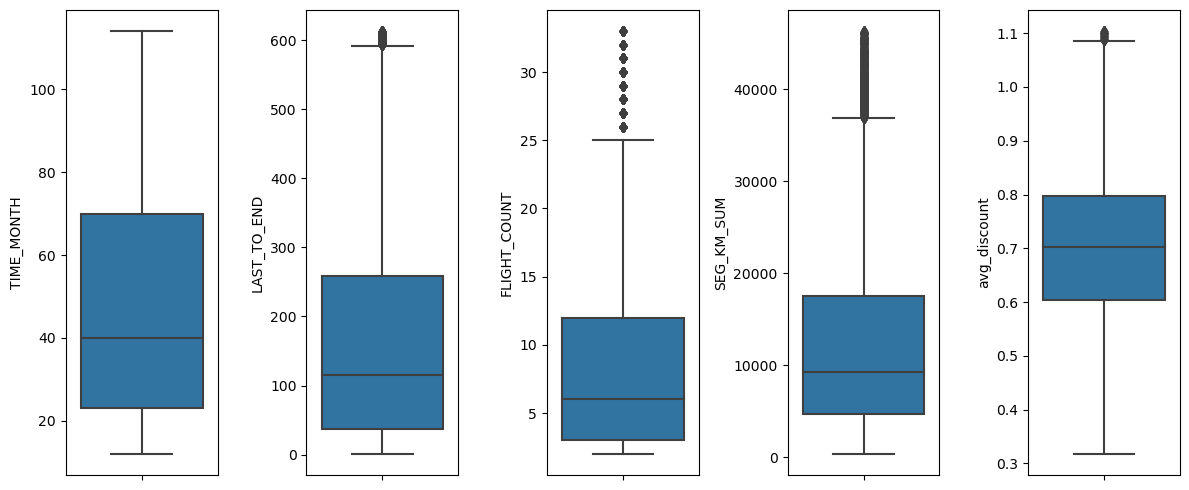

In [35]:
#melihat data outliers

column = airline_LRFMC.columns

plt.figure(figsize=(12,5))

for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    sns.boxplot(y = airline_LRFMC[column[i]])
plt.tight_layout()
plt.show()

**Observation**

Jumlah data setelah dilakukan outlier handling menjadi 51650

## Feature Standarization

In [36]:
airline_LRFMC.describe()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,51650.000000,51650.000000,51650.000000,51650.000000,51650.000000
mean,47.635779,170.095973,8.805402,12465.127938,0.699109
std,27.838047,161.808233,7.022319,9932.187396,0.144748
min,12.000000,1.000000,2.000000,368.000000,0.317624
25%,23.000000,37.000000,3.000000,4756.000000,0.603480
50%,40.000000,116.000000,6.000000,9294.500000,0.702044
75%,70.000000,259.000000,12.000000,17583.750000,0.796656
max,114.000000,613.000000,33.000000,46304.000000,1.103835


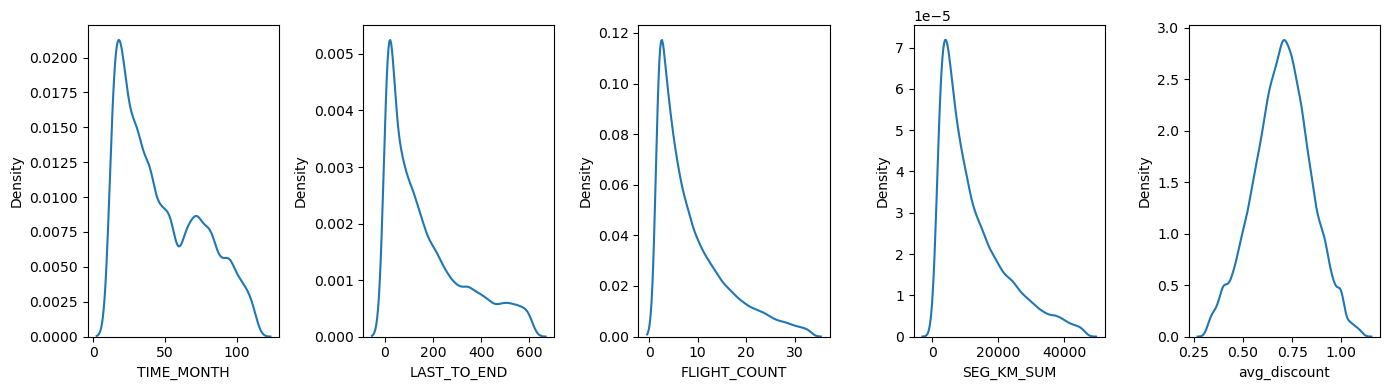

In [37]:
#melihat distribusi data sebelum distandarisasi

fitur = ["TIME_MONTH","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]

plt.figure(figsize=(14,4))
for i in range(len(fitur)):
    plt.subplot(1,5, i+1)
    sns.kdeplot(x = airline_LRFMC[fitur[i]])

plt.tight_layout()
plt.show()

**Observation**

Terlihat jumlah nilai dari masing-masing fitur berbeda maka dari itu disini akan dilakukan standarization terlebih dahulu dengan harapan memudahkan model untuk belajar dan dalam skala yang sama

In [38]:
#merubah nama fitur menjadi ["L,R,F,M,C"]
airline_LRFMC.columns = ["L","R","F","M","C"]

In [39]:
scaler = StandardScaler()
fitur = ["L","R","F","M","C"]

X = airline_LRFMC[fitur]
X_std = scaler.fit_transform(X)
airline_LRFMC_std = pd.DataFrame(data = X_std, columns = fitur)
airline_LRFMC_std.head()

,L,R,F,M,C
0,1.198523,-0.952346,2.733397,3.391720,2.759259
1,1.521825,-0.952346,2.875801,3.153905,2.766620
2,0.875221,-0.383766,-0.114693,3.336545,2.373702
3,-0.130606,-1.007968,2.875801,3.178371,2.488459
4,1.090756,1.643344,-0.399502,3.322047,2.214945


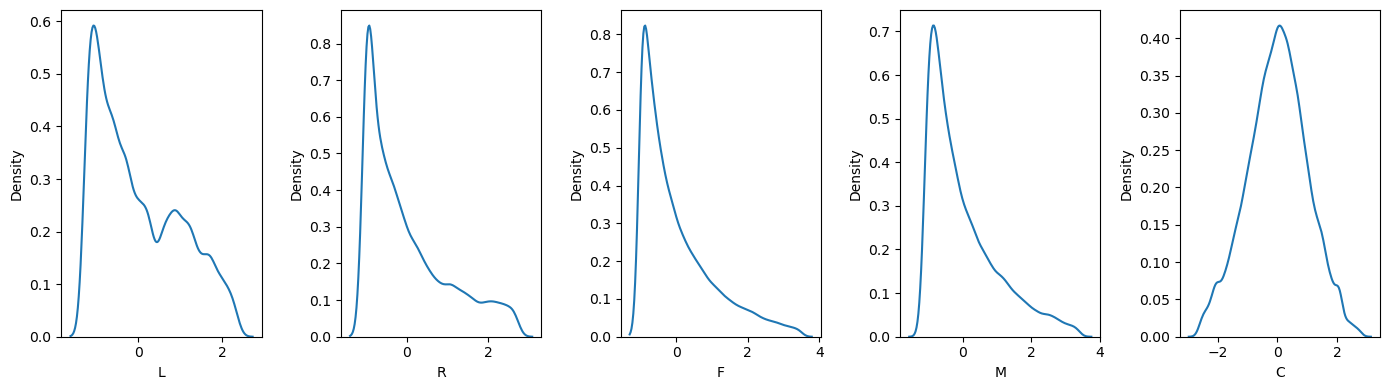

In [40]:
#melihat distribusi data yang dilakukan standarisasi

fitur = ["L","R","F","M","C"]

plt.figure(figsize=(14,4))
for i in range(len(fitur)):
    plt.subplot(1,5, i+1)
    sns.kdeplot(x = airline_LRFMC_std[fitur[i]])

plt.tight_layout()
plt.show()

In [41]:
airline_LRFMC_std.describe()

,L,R,F,M,C
count,5.165000e+04,5.165000e+04,51650.000000,5.165000e+04,5.165000e+04
mean,-1.540770e-17,1.320660e-17,0.000000,-1.760880e-17,-1.452726e-16
std,1.000010e+00,1.000010e+00,1.000010,1.000010e+00,1.000010e+00
min,-1.280123e+00,-1.045049e+00,-0.969120,-1.217984e+00,-2.635541e+00
25%,-8.849765e-01,-8.225617e-01,-0.826715,-7.761838e-01,-6.606642e-01
50%,-2.742956e-01,-3.343247e-01,-0.399502,-3.192306e-01,2.027402e-02
75%,8.033766e-01,5.494460e-01,0.454925,5.153620e-01,6.739193e-01
max,2.383963e+00,2.737242e+00,3.445419,3.407024e+00,2.796107e+00


**Observation**

1. Data sudah dilakukan standarisasi dalam skala yang sama
2. Terlihat distribusi data cenderung skew kanan yang artinya distribusi cenderung positive skew (Mean > Median)

# Modeling

Modeling untuk segmentasi disini menggunakan metode **K-Mean Clustering** sebelum menentukan jumlah cluster yang optimal maka dilakukan analisis n-cluster menggunakan **Elbow Method** dan **Silhoutte Method**

## Elbow Method

In [42]:
list_inertia = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airline_LRFMC_std.values)
    inertia_values = kmeans.inertia_
    list_inertia.append(inertia_values)
    print(f"cluster : {i} inertia value = {inertia_values}")

cluster : 2 inertia value = 180630.61944525468
cluster : 3 inertia value = 148947.59647518492
cluster : 4 inertia value = 125423.18340699468
cluster : 5 inertia value = 109987.39855843686
cluster : 6 inertia value = 100144.61716067258
cluster : 7 inertia value = 92451.38158116164
cluster : 8 inertia value = 85983.89240053459
cluster : 9 inertia value = 80282.70943465314
cluster : 10 inertia value = 75882.50941540262


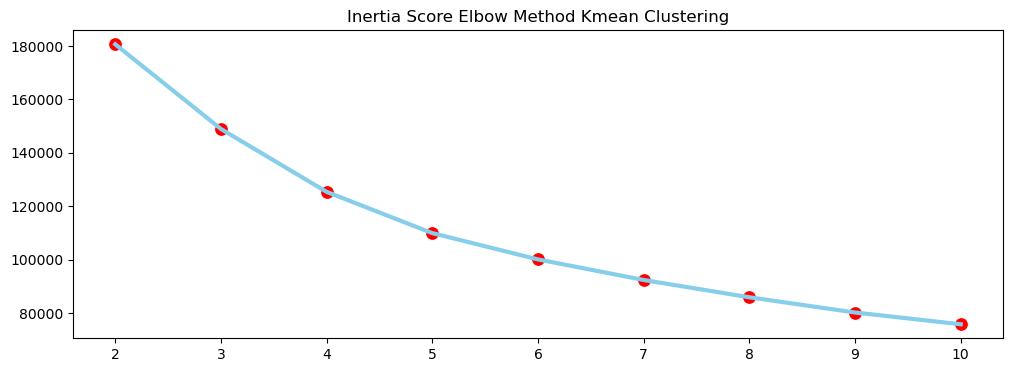

In [43]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x=range(2, 11), y=list_inertia, color="skyblue", linewidth = 3)
sns.scatterplot(x=range(2, 11), y=list_inertia, s=100, color='red')
plt.title("Inertia Score Elbow Method Kmean Clustering")

plt.show()

**Observation**

Simulasi menggunakan **Elbow Method** tidak terlalu terlihat titik tajam patahan drop pointnya diantara angka 4 dan 6 maka disini saya memakai bantuan library **yellowbrick** dan divisualisasikan dengan menggunakan **KElbowVisualizer**

In [44]:
#install library yellowbrick
!pip install yellowbrick

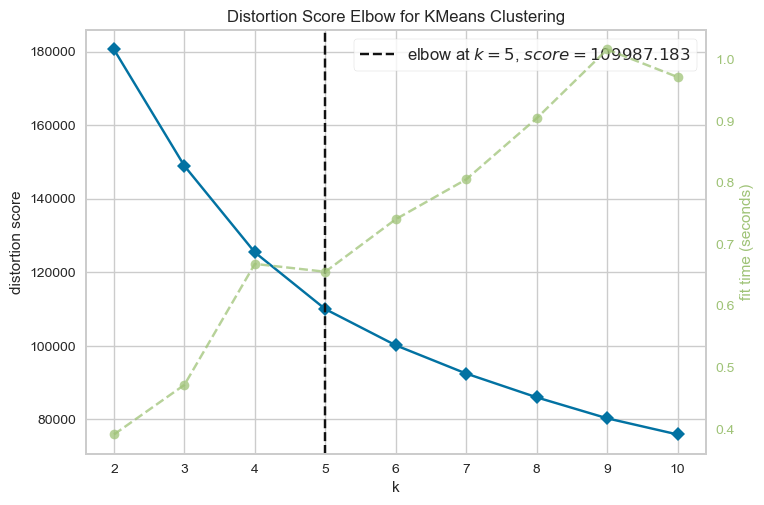

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(airline_LRFMC_std.values)       
visualizer.show() 

**Observation**

Terlihat pada saat menggunakan **KElbowVisualizer** bahwa cluster yang optimal pada angka 5 untuk perbandingan disini saya juga melakukan simulasi menggunakan **Silhoutte Method**

## Silhoutte Method

In [46]:
from sklearn.metrics import silhouette_score
list_silhoutte_score = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airline_LRFMC_std)
    pred = kmeans.predict(airline_LRFMC_std)
    
    score_euclidean = silhouette_score(airline_LRFMC_std, pred, metric='euclidean')
    list_silhoutte_score.append(score_euclidean)

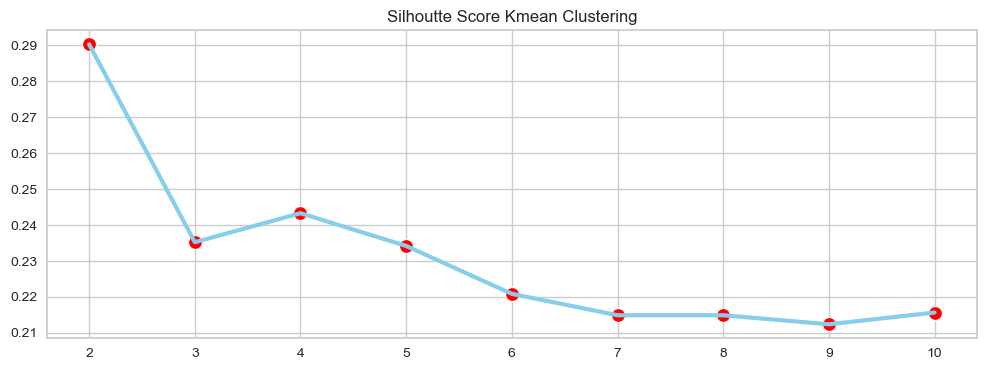

In [47]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x=range(2, 11), y=list_silhoutte_score, color="skyblue", linewidth = 3)
sns.scatterplot(x=range(2, 11), y=list_silhoutte_score, s=100, color='red')
plt.title("Silhoutte Score Kmean Clustering")

plt.show()

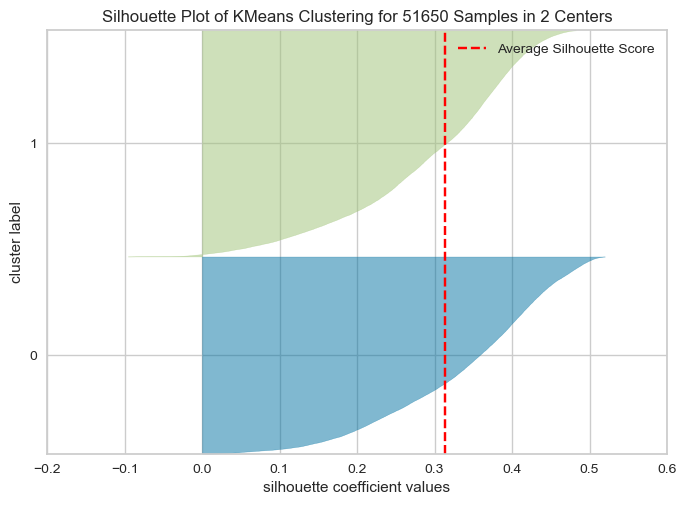

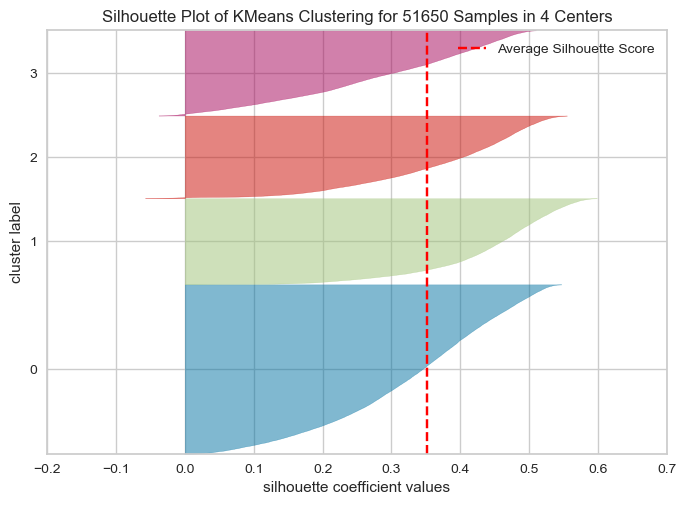

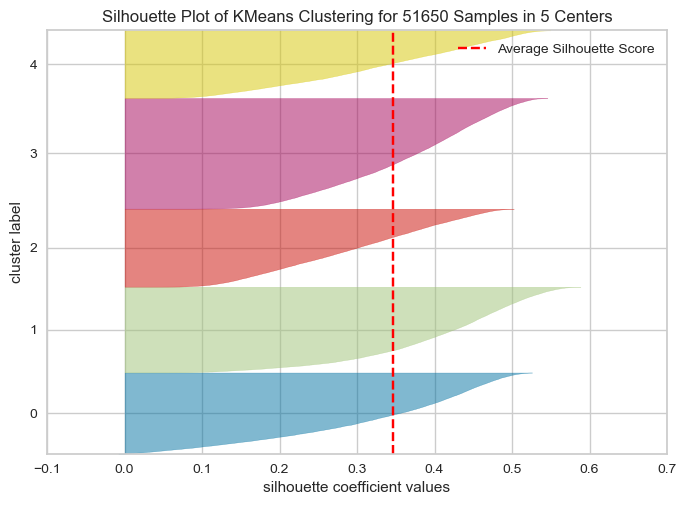

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2,4,5]:
    model = KMeans(i, random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(airline_LRFMC_std)        
    visualizer.show()

**Hasil Observation Elbow dan Silhoutte Method**

Dari Simulasi menggunakan **Silhoutte Method** terlihat bahwa cluster yang optimal yaitu di angka 2 dan 4 dikarenakan nilai rata-ratanya paling tinggi dibandingkan dengan yang lain sedangkan pada **Elbow Method** cluster yang optimal di angka 5. Oleh karena itu saya akan melakukan perbandingan cluster pada angka 2, 4 dan 5 untuk melihat cluster yang paling optimal

# Evaluasi dan Visualisasi Menggunakan PCA

Untuk Evaluasi dan Visualisasi disini menggunakan PCA dikarenakan terdapat 5 fitur atau 5 dimensi untuk memudah visualisasi masing-masing Cluster

## Simulasi menggunakan 2 Cluster

In [75]:
airline_LRFMC_std = airline_LRFMC_std.drop("cluster", axis = 1)
#simulasi menggunakan 2 cluster
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_2.fit(airline_LRFMC_std.values)

KMeans(n_clusters=2, random_state=0)

In [76]:
airline_LRFMC_std['cluster'] = kmeans_2.labels_

In [77]:
airline_LRFMC_std.head(3)

,L,R,F,M,C,cluster
0,1.198523,-0.952346,2.733397,3.391720,2.759259,1
1,1.521825,-0.952346,2.875801,3.153905,2.766620,1
2,0.875221,-0.383766,-0.114693,3.336545,2.373702,1


In [78]:
display(airline_LRFMC_std.groupby('cluster').agg(['median','mean']))

L                   R                   F                   M  \
           median      mean    median      mean    median      mean    median   
cluster                                                                         
0       -0.382063 -0.108027  0.024128  0.278388 -0.684311 -0.532066 -0.625460   
1        0.084928  0.248656 -0.810201 -0.640792  1.024543  1.224709  1.062301   

                          C            
             mean    median      mean  
cluster                                
0       -0.527450 -0.016874 -0.049131  
1        1.214083  0.095772  0.113090

Terlihat bahwa masing-masing cluster memiliki nilai **LRFMC** yang berbeda satu sama lain

In [79]:
pca = PCA(n_components=2)

pca.fit(airline_LRFMC_std)
pcs = pca.transform(airline_LRFMC_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_2'] = airline_LRFMC_std['cluster']
data_pca.head()

,PC 1,PC 2,clusters_2
0,4.632748,2.500789,1
1,4.630230,2.671557,1
2,2.550965,2.141763,1
3,4.383275,1.660509,1
4,1.541553,2.520241,1


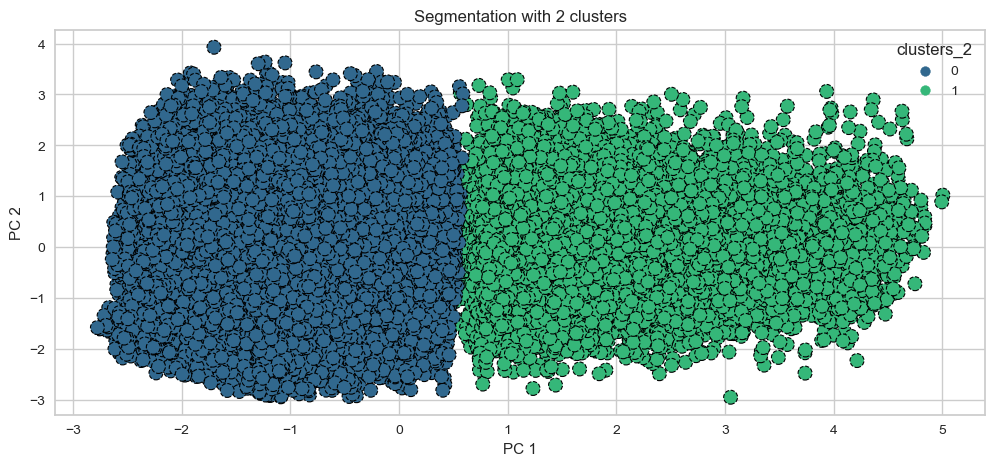

In [80]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_2",data=data_pca, edgecolor='black', linestyle='--', s = 100,
                palette='viridis', ax=ax)
plt.title("Segmentation with 2 clusters")
plt.show()

**Hasil Observation 2 Cluster**

1. Masing-masing Cluster memiliki nilai **LRFMC** yang berbeda
2. Terlihat pada segmentasi menggunakan 2 cluster bahwa cluster 0 dan cluster 1 masih berimpitan tetapi cluster sudah terpisahkan cukup baik

## Simulasi menggunakan 4 Cluster

In [81]:
#simulasi menggunakan 4 cluster
from sklearn.cluster import KMeans
airline_LRFMC_std = airline_LRFMC_std.drop("cluster", axis = 1)
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(airline_LRFMC_std.values)

KMeans(n_clusters=4, random_state=0)

In [82]:
airline_LRFMC_std['cluster'] = kmeans_4.labels_

In [83]:
airline_LRFMC_std.head(3)

,L,R,F,M,C,cluster
0,1.198523,-0.952346,2.733397,3.391720,2.759259,1
1,1.521825,-0.952346,2.875801,3.153905,2.766620,1
2,0.875221,-0.383766,-0.114693,3.336545,2.373702,1


In [84]:
display(airline_LRFMC_std.groupby('cluster').agg(['median','mean']))

L                   R                   F                   M  \
           median      mean    median      mean    median      mean    median   
cluster                                                                         
0       -0.561675 -0.325263  1.581542  1.614001 -0.826715 -0.697152 -0.795314   
1        0.049006  0.195987 -0.834922 -0.660022  1.451757  1.590376  1.457183   
2       -0.777209 -0.692091 -0.464109 -0.385149 -0.399502 -0.320229 -0.421274   
3        1.162601  1.206872 -0.377586 -0.259566 -0.399502 -0.295552 -0.394693   

                          C            
             mean    median      mean  
cluster                                
0       -0.663064  0.160635  0.097926  
1        1.558225  0.121299  0.148828  
2       -0.321037 -0.132360 -0.169153  
3       -0.296192  0.060748  0.043871

Terlihat bahwa pada cluster 2 dan 3 pada Kolom `F` **(Frequency)** memiliki nilai yang sama sedangkan fitur lainnya memiliki nilai yang berbeda

In [85]:
pca = PCA(n_components=2)

pca.fit(airline_LRFMC_std)
pcs = pca.transform(airline_LRFMC_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_4'] = airline_LRFMC_std['cluster']
data_pca.head()

,PC 1,PC 2,clusters_4
0,4.187710,2.249171,1
1,4.210527,2.108702,1
2,2.152164,1.481576,1
3,3.863407,2.610646,1
4,0.996602,1.891464,1


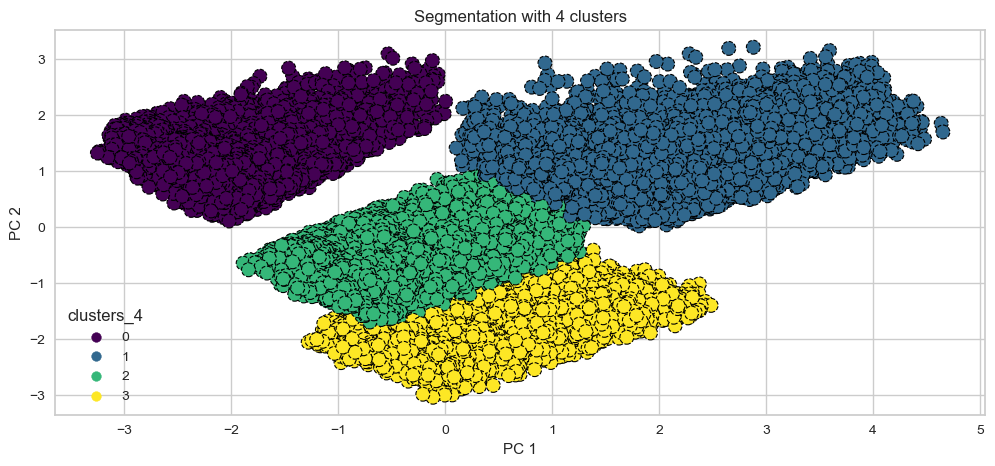

In [86]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_4", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s = 100)
plt.title("Segmentation with 4 clusters")
plt.show()

**Hasil Observation 4 Cluster**

1. pada cluster 2 dan 3 pada Kolom `F` **(Frequency)** memiliki nilai yang sama sedangkan fitur lainnya memiliki nilai yang berbeda
2. Terlihat pada segmentasi menggunakan 4 cluster bahwa cluster 2 dan cluster 3 masih berimpitan tetapi cluster sudah terpisahkan cukup baik dengan adanya overlap pada cluster 2 dikarenakan nilainya sama untuk **Frequency** nya

## Simulasi menggunakan 5 Cluster

In [87]:
#simulasi menggunakan 5 cluster
from sklearn.cluster import KMeans
airline_LRFMC_std = airline_LRFMC_std.drop("cluster", axis = 1)
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(airline_LRFMC_std.values)

KMeans(n_clusters=5, random_state=0)

In [88]:
airline_LRFMC_std['cluster'] = kmeans_5.labels_

In [89]:
airline_LRFMC_std.head(3)

,L,R,F,M,C,cluster
0,1.198523,-0.952346,2.733397,3.391720,2.759259,0
1,1.521825,-0.952346,2.875801,3.153905,2.766620,0
2,0.875221,-0.383766,-0.114693,3.336545,2.373702,0


In [90]:
display(airline_LRFMC_std.groupby('cluster').agg(['median','mean']))

L                   R                   F                   M  \
           median      mean    median      mean    median      mean    median   
cluster                                                                         
0        0.049006  0.198349 -0.841102 -0.671007  1.594161  1.643498  1.517593   
1       -0.741287 -0.653589 -0.525911 -0.417512 -0.257097 -0.193154 -0.313643   
2       -0.669442 -0.494734 -0.031494  0.122090 -0.684311 -0.578839 -0.655464   
3       -0.453908 -0.230674  1.723687  1.719374 -0.826715 -0.688743 -0.796925   
4        1.234446  1.287964 -0.420848 -0.293803 -0.399502 -0.236614 -0.323208   

                          C            
             mean    median      mean  
cluster                                
0        1.620463  0.066936  0.096427  
1       -0.236854  0.385318  0.479316  
2       -0.516910 -1.234111 -1.297729  
3       -0.662088  0.422358  0.484345  
4       -0.235754  0.059346  0.087943

Terlihat bahwa masing-masing cluster memiliki nilai **LRFMC** yang berbeda satu sama lain

In [91]:
pca = PCA(n_components=2)

pca.fit(airline_LRFMC_std)
pcs = pca.transform(airline_LRFMC_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters_5'] = airline_LRFMC_std['cluster']
data_pca.head()

,PC 1,PC 2,clusters_5
0,4.330359,2.610127,0
1,4.253265,2.820028,0
2,2.865614,1.224378,0
3,4.459207,1.595665,0
4,2.068840,0.768552,0


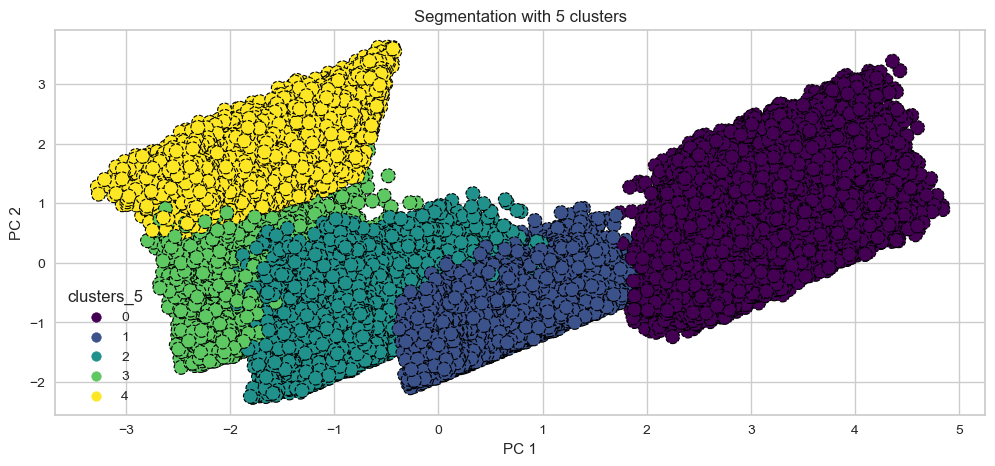

In [92]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters_5", data=data_pca, edgecolor='black', linestyle='--', s =100,
                palette='viridis', ax=ax)
plt.title("Segmentation with 5 clusters")
plt.show()

**Hasil Observation 5 Cluster**

1. Masing-masing Cluster memiliki nilai LRFMC yang berbeda
2. Terlihat pada segmentasi menggunakan 5 cluster bahwa cluster sudah terpisahkan cukup baik dengan adanya sedikit overlap pada masing-masing cluster

## Hasil Evaluasi

Berdasarkan perbandingan antara cluster 2, 4, 5 disini saya memutuskan untuk menggunakan 5 Cluster dikarenakan nilai **LRFMC** pada masing-masing Cluster berbeda dan hanya terdapat sedikit overlap dibandingkan menggunakan 4 cluster yang terdapat nilai yang sama pada **Frequency** di cluster 2 dan 3 serta untuk 2 Cluster terlalu sedikit informasi yang didapatkan apabila digunakan untuk segmentasi

# Insight

In [93]:
#menambahkan cluster ke dalam dataframe airline_LRFMC
airline_LRFMC['cluster'] = kmeans_5.labels_
display(airline_LRFMC.groupby('cluster').agg(['median','mean']))

L                 R                  F                   M  \
        median       mean median        mean median       mean   median   
cluster                                                                   
0         49.0  53.157379   34.0   61.522512   20.0  20.346457  27538.0   
1         27.0  29.441327   85.0  102.539720    7.0   7.449026   9350.0   
2         29.0  33.863493  165.0  189.850883    4.0   4.740647   5955.0   
3         35.0  41.214338  449.0  448.302131    3.0   3.968879   4550.0   
4         82.0  83.489821  102.0  122.556724    6.0   7.143840   9255.0   

                              C            
                 mean    median      mean  
cluster                                    
0        28559.715122  0.708798  0.713067  
1        10112.676316  0.754882  0.768488  
2         7331.135246  0.520476  0.511268  
3         5889.210826  0.760244  0.769216  
4        10123.598872  0.707699  0.711838

### Jumlah Customer berdasarkan Cluster

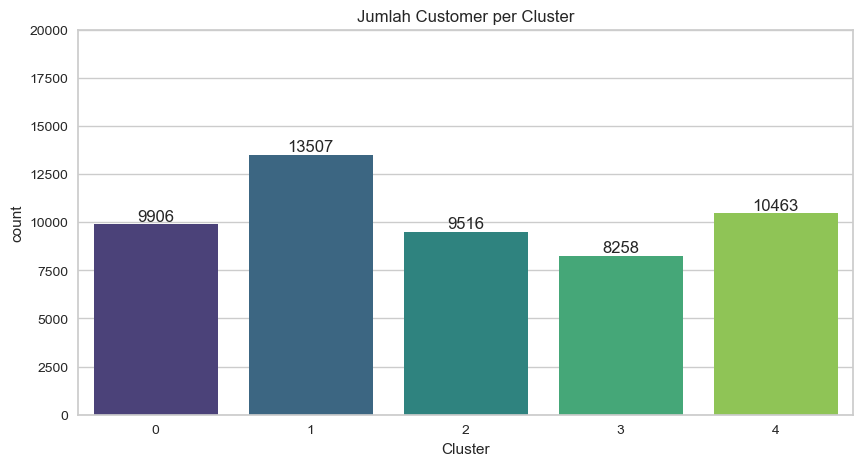

In [94]:
#melihat jumlah Customer masing-masing Cluster

plt.figure(figsize=(10,5))
ax = sns.countplot(data= airline_LRFMC, x = "cluster", palette="viridis")
ax.bar_label(ax.containers[0])
plt.ylim(0,20000)
plt.title("Jumlah Customer per Cluster")
plt.xlabel("Cluster")
plt.show()

**Observation**

Terlihat bahwa Customer mendominasi pada Cluster 1 dan Cluster 4

### Nilai LRFMC pada masing-masing Cluster

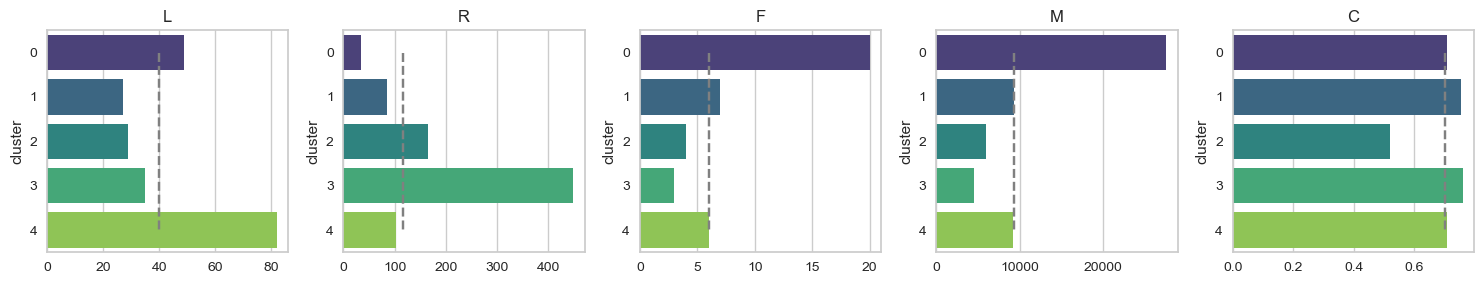

In [95]:
#melihat nilai LRFMC pada masing-masing cluster
column = ["L","R","F","M","C"]

plt.figure(figsize=(15,3))
for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    plt.vlines(airline_LRFMC[column[i]].median(), ymin=0, ymax=4, color='grey', linestyle='--')
    group = airline_LRFMC.groupby('cluster')
    index = group[column[i]].median().index
    value = group[column[i]].median().values
    sns.barplot(y = index, x = value, orient='h', palette='viridis')
    plt.title(column[i])

plt.tight_layout()
plt.show()

### Hasil Observation

Terlihat masing-masing cluster terbentuk karena adanya perbedaan pada indikator model **LRFMC**. Berdasarkan analisis dan visualisasi diatas dapat disimpulkan bahwa: 

- **Cluster 0 -  (The Champions)** : 

Customer yang sudah menjadi anggota dalam jangka waktu menengah dan sering melakukan penerbangan dengan jarak tempuh penerbangan yang jauh terlihat pada indikator Recency yang rendah, Frequency dan Monetary nya yang tinggi

- **Cluster 1 - (Recent Users - Potential Loyalist)** : 

Customer yang baru menjadi anggota dan baru melakukan penerbangan dengan jarak tempuh penerbangan yang cukup jauh terlihat pada Recency yang rendah, Frequency dan Monetarynya yang cukup tinggi

- **Cluster 2 - (Need Attention)** : 

Customer yang belum lama menjadi anggota dan jarang melakukan penerbangan dan biasa melakukan penerbangan dengan jarak tempuh yang cepat/dekat terlihat dari Recency yang cukup tinggi, Frequency, Monetary dan Discount (C) yang rendah
- **Cluster 3 - (Hibernating)** : 

Customer yang sudah menjadi anggota dalam jangka waktu menengah dan jarang melakukan penerbangan. Meskipun melakukan penerbangan tetapi dalam jarak tempuh yang cepat/dekat serta melakukan penerbangan apabila terdapat voucher diskon. Terlihat pada Recency, Discount (C) yang tinggi sedangkan Frequency dan Monetarynya paling rendah

- **Cluster 4 - (Loyal Customers)** : 

Customer yang sudah lama menjadi anggota dan melakukan penerbangan dalam jangka waktu menengah dengan jarak tempuh cukup cepat/dekat. Terlihat pada Length yang sangat tinggi sedangkan Frequency, Monetarynya cukup rendah

### Business Recommendation

- **Cluster 0 -  (The Champions) dan Cluster 4 - (Loyal Customers)** : 
     - Memberikan Ucapan "Terima Kasih" setiap customer menggunakan Maskapai dan Memberikan "Customer Greeting" serta memberikanvoucher/discount untuk penerbangan berikutnya.
    - Memberikan point/reward untuk setiap pemesanan maskapai yang dapat direedem dengan voucher diskon atau produk afiliasi dengan maskapai.
    - Memberikan Merchandise dan pelayanan yang spesial kepada customer karena sudah menjadi customer loyal
- **Cluster 1 - (Recent Users - Potential Loyalist)** : 
    - Membangun dan menjaga hubungan baik dengan Customer
    - Memberikan potongan harga (discount) dengan mengajak teman untuk menggunakan Maskapai
    - Memberikan potongan harga (discount) untuk penerbangan selanjutnya
    - Memberikan point/reward untuk setiap pemesanan maskapai yang dapat direedem dengan voucher diskon atau produk afiliasi dengan maskapai.
- **Cluster 2 - (Need Attention)** : 
    - Memberikan flyer campaign atau informasi terkait promo penerbangan
    - Memberikan newsletter kepada customer terkait discount dan program penerbangan dengan harapan customer untuk menggunakan maskapai kembali
- **Cluster 3 - (Hibernating)** : 
    - Memberikan flyer campaign atau informasi terkait promo penerbangan
    - Memberikan spesial promo/program penerbangan dengan batas waktu yang ditentukan 